In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
dfh = pd.read_csv('./HOLY_after_race3.csv')
df = pd.read_csv("./odds_scraping/BettingOdds.csv")

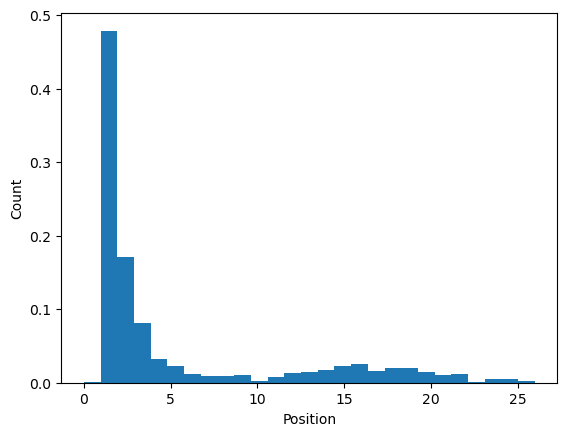

In [3]:
import matplotlib.pyplot as plt
s = dfh.loc[dfh.grid==1]['podium'].values
plt.hist(s, density=True, bins=27)
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

In [35]:
p1 = (s==1).sum()/len(s)
p2 = (s==2).sum()/len(s)
p3 = (s==3).sum()/len(s)
# p4 = (s==4).sum()/len(s)

weights = [p1,p2,p3]#,p4]

In [5]:
pd.set_option('display.max_columns',200)
df

,Unnamed: 0.1,Unnamed: 0,Odds To Win 2021 Emilia Romagna GP (4/18/21),Odds To Win 2021 F1 Portuguese GP (3/28/21),Odds To Win 2021 F1 Spanish GP (5/9/21),Odds To Win 2021 F1 Monaco GP (3/28/21),Odds To Win 2021 F1 Azerbaijan GP (6/6/21),Odds To Win 2021 F1 French GP (6/20/21),Odds To Win 2021 F1 Austrian GP (6/26/21),Odds To Win 2021 F1 British GP (7/18/21),Odds To Win 2021 F1 Hungarian GP (8/1/21),Odds To Win 2021 F1 Belgium GP (8/29/21),Odds To Win 2021 F1 Dutch GP (9/5/21),Odds to Win 2021 F1 Italian GP (9/12/2021),Odds to Win 2021 F1 Russian GP (9/12/2021),Odds to Win 2021 F1 Turkish GP (10/10/2021),Odds to Win 2021 F1 U.S. GP (10/24/2021),Odds to Win 2021 F1 Mexico City GP (11/5/2021),Odds to Win 2021 F1 Abu Dhabi GP (12/12/2021),2022 F1 BAHRAIN GP BETTING ODDS,2022 F1 SAUDI ARABIAN GP BETTING ODDS,2022 F1 AUSTRALIAN GP BETTING ODDS,2022 F1 EMILIA ROMAGNA GP BETTING ODDS,2022 F1 MIAMI GP BETTING ODDS,2022 F1 SPANISH GP BETTING ODDS,2022 F1 MONACO GP BETTING ODDS,2022 F1 AZERBAIJAN GP BETTING ODDS,2022 F1 CANADIAN GP BETTING ODDS,2022 F1 BRITISH GP BETTING ODDS,2022 F1 AUSTRIAN GP BETTING ODDS,2022 F1 FRENCH GP BETTING ODDS,2022 F1 HUNGARIAN GP BETTING ODDS,2022 F1 BELGIAN GP BETTING ODDS,2022 F1 DUTCH GP BETTING ODDS,2022 F1 ITALIAN GP BETTING ODDS,2022 F1 SINGAPORE GP BETTING ODDS,2022 F1 JAPANESE GP BETTING ODDS,2022 F1 U.S. GP BETTING ODDS
0,0,Max Verstappen,130.0,140.0,200.0,140.0,-110.0,110.0,-148.0,-160.0,-110.0,110.0,-138.0,150.0,450.0,100.0,150.0,-150.0,200.0,150.0,+155,125.0,200.0,100.0,100.0,125.0,110.0,-120.0,-110.0,-120.0,110.0,110.0,-120.0,-175.0,-275.0,-250.0,-200.0,-250.0
1,1,Lewis Hamilton,150.0,160.0,-195.0,100.0,250.0,140.0,200.0,185.0,120.0,110.0,187.0,-120.0,-163.0,120.0,-120.0,187.0,-225.0,300.0,+1000,1400.0,1100.0,2500.0,2500.0,1600.0,2800.0,3300.0,1100.0,1000.0,850.0,1200.0,500.0,1200.0,2000.0,1200.0,1000.0,1200.0
2,2,Valtteri Bottas,1000.0,1000.0,1000.0,700.0,1400.0,800.0,1200.0,1100.0,1400.0,1600.0,1600.0,650.0,350.0,1600.0,1100.0,2000.0,1600.0,20000.0,+13000,10000.0,40000.0,15000.0,8000.0,10000.0,15000.0,20000.0,25000.0,25000.0,50000.0,100000.0,100000.0,100000.0,250000.0,250000.0,200000.0,100000.0
3,3,Sergio Perez,1400.0,1100.0,5000.0,1600.0,750.0,2000.0,1200.0,NaN,1600.0,1100.0,2500.0,3300.0,2500.0,1600.0,1800.0,1200.0,2800.0,1800.0,+1600,1400.0,1400.0,900.0,1600.0,NaN,550.0,275.0,900.0,1000.0,1400.0,1400.0,2000.0,1000.0,900.0,1600.0,1000.0,800.0
4,4,Pierre Gasly,3300.0,5000.0,25000.0,10000.0,6000.0,6000.0,10000.0,8000.0,15000.0,NaN,10000.0,6600.0,10000.0,20000.0,10000.0,10000.0,10000.0,6500.0,,10000.0,27500.0,40000.0,50000.0,100000.0,30000.0,15000.0,40000.0,40000.0,NaN,75000.0,100000.0,100000.0,200000.0,75000.0,100000.0,100000.0
5,5,Lando Norris,5000.0,2800.0,10000.0,5000.0,1800.0,10000.0,3300.0,4000.0,3500.0,2800.0,4000.0,3300.0,2500.0,3300.0,4000.0,4000.0,6600.0,2800.0,+15000,15000.0,8500.0,4000.0,8000.0,25000.0,10000.0,10000.0,15000.0,12500.0,17500.0,25000.0,22500.0,15000.0,35000.0,22500.0,2000.0,20000.0
6,6,Charles Leclerc,5000.0,3300.0,4000.0,3300.0,1600.0,10000.0,5000.0,5000.0,2200.0,4000.0,1600.0,6600.0,6600.0,3300.0,4000.0,4000.0,6600.0,500.0,+125,145.0,100.0,150.0,125.0,100.0,175.0,NaN,225.0,250.0,137.0,150.0,350.0,350.0,500.0,400.0,350.0,450.0
7,7,Daniel Ricciardo,5000.0,5000.0,10000.0,5000.0,4000.0,20000.0,10000.0,8000.0,8000.0,20000.0,10000.0,10000.0,2800.0,6600.0,10000.0,6600.0,10000.0,6500.0,+25000,25000.0,12500.0,8000.0,30000.0,50000.0,35000.0,25000.0,27500.0,25000.0,40000.0,50000.0,50000.0,25000.0,10000.0,75000.0,50000.0,75000.0
8,8,Yuki Tsunoda,8000.0,15000.0,100000.0,75000.0,75000.0,NaN,20000.0,20000.0,50000.0,50000.0,NaN,100000.0,50000.0,NaN,50000.0,25000.0,25000.0,15000.0,+50000,20000.0,50000.0,50000.0,100000.0,NaN,50000.0,50000.0,100000.0,50000.0,100000.0,150000.0,200000.0,200000.0,250000.0,200000.0,200000.0,150000.0
9,9,George Russell,20000.0,100000.0,250000.0,200000.0,NaN,NaN,50000.0,50000.0,50000.0,15000.0,NaN,200000.0,4000.0,10000.0,10000.0,10000.0,50000.0,900.0,+2800,2

In [6]:
dfh = dfh[['season','round','driver','grid','podium']]
dfh = dfh.loc[(dfh['season'] == 2022) | (dfh['season'] == 2021)]
dfh

,season,round,driver,grid,podium
14606,2021,1,vettel,20,15
14607,2021,1,ricciardo,6,7
14608,2021,1,tsunoda,13,9
14609,2021,1,alonso,9,19
14610,2021,1,giovinazzi,12,12
...,...,...,...,...,...
15317,2022,22,vettel,9,10
15318,2022,22,leclerc,3,2
15319,2022,22,norris,7,6
15320,2022,22,latifi,20,19


In [7]:
df = df.drop(columns=["Unnamed: 0"])
df = df.fillna(0)
df = df.replace({" ":0})
df = df.astype(float)

In [44]:
def getRO():
    randRace = random.randrange(1,df.shape[1])
    numberList = [0, 1, 2]#, 3]
    i = random.choices(numberList, weights=weights, k=1)[0]
    minOdd = sorted(set(df.iloc[:,randRace]))[i]
    if minOdd==0:
        return getRO()
    return minOdd
getRO()

100.0

In [38]:
#MANUALLY CHANGE ACCURACY

def model(accuracy):
    countPos = 0
    countNeg = 0

    win_race = accuracy

    all_trials = []

    matrix = np.zeros((1000,22))
    
    for trial in range(1000):
        matrix[trial][0]=0
        portfolio = 1000
        bet_size = 100
        a = []
        for race in range(1,22):
            odds = getRO()
            if odds<0:
                decodds = 100/(0-odds)
            else:
                decodds = odds/100
            r = random.random()
            if r < win_race:
                #we predicted correctly
                #odds += 100
                portfolio += bet_size * (decodds)
            else:
                portfolio -= bet_size
            a.append(portfolio)
            matrix[trial][race] = ((portfolio/1000)-1)*100
        pr = [((x / 1000)-1)*100 for x in a]
        pr = np.insert(pr,0,0)
        plt.plot(pr, color='blue',alpha=0.05, markersize=.01)
        plt.title("Percent Return after Each Race in Hypothetical Season for 100 Trials")
        plt.xlabel("Race Number")
        plt.ylabel("Percent Return")
        #a.
        all_trials.append(pr)

        if portfolio>1000:
            countPos+=1
        else:
            countNeg+=1

    #plt.subplot(212)
    average = np.mean(matrix, axis=0)
    sd = np.std(matrix, axis=0)
    print(sd)
    plt.plot(average, color='red',alpha=1, markersize=.05)
    
    n=22
    output = []
    
    print("Average Return: ",round(average[len(average)-1],2),"%",sep='')
    print("Percent Won: ",countPos/10,"%",sep='')
    print("Percent Lost: ",countNeg/10,"%",sep='')
    print("Accuracy: ",win_race)

    for i in range(0, n):
        output.append(i)
    
    #print(matrix)
    y = average
    #ci = 1.96 * sd/np.sqrt(len(average)-1)
    print(len(average))
    #ci = 1.96 * sd/np.sqrt(matrix.shape[0])
    ci = 1.96 * sd/np.sqrt(1000)
    #print(y)
    #print(sd)
    #print(ci)
    plt.fill_between(output, (y-ci), (y+ci), color='r', alpha=.2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.title("Monte Carlo Simulation of Portfolio Size, \nN = 1000, prediction accuracy = {}".format(accuracy))
    plt.xlabel("Race Number")
    plt.ylabel("Percent Return")
    
    plt.axhline(y=0, color='black', linestyle='-')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.6)
    
    plt.show()

In [29]:
dfgp = dfh[['grid','podium']]

In [30]:
dfg1p = dfgp.loc[dfgp['grid'] == 1]
dfg1p = dfg1p.reset_index()

[ 0.         12.06965608 17.43871355 21.03957792 23.75735193 26.15409198
 27.53984571 30.24754184 32.1547136  34.57091131 36.58460929 38.99145218
 40.50034801 42.7719363  44.15780059 45.87753713 47.48061875 48.47980923
 50.05842282 51.64556765 52.98896535 54.23623748]
Average Return: -35.28%
Percent Won: 22.7%
Percent Lost: 77.3%
Accuracy:  0.4
22


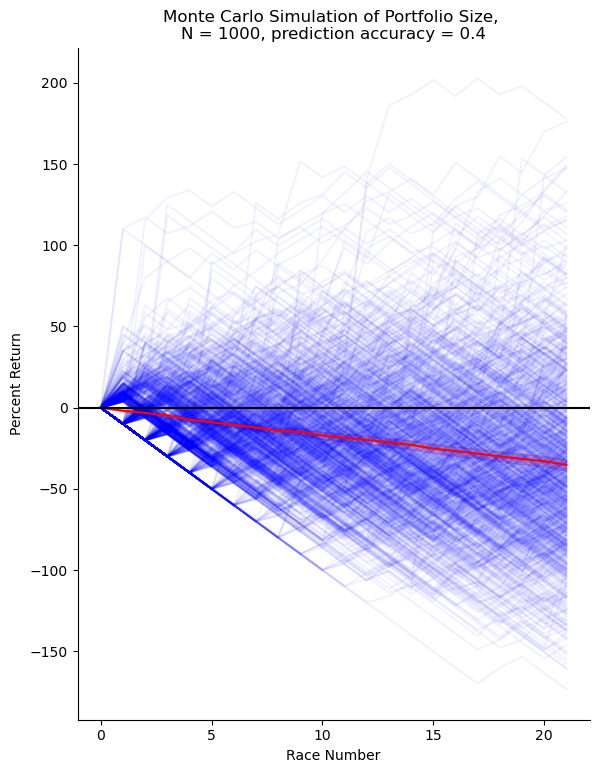

In [39]:
#fix later
g = random.randrange(1,dfg1p.shape[1])
#model_mult()
model(.4)
# if (dfg1p.iloc[g,1]==1):
#     print("Front Runner Wins")
# else:
#     print("Front Runner Does Not Win")

[ 0.         11.72731204 17.18138189 21.65719622 24.8412801  28.10691228
 30.36301544 32.87303522 34.5842501  37.59305408 40.07943975 42.31811876
 44.00889952 45.63045042 47.58352459 49.24703194 50.50639502 51.51845946
 53.58649051 55.45357435 56.82267994 58.77197441]
Average Return: 7.73%
Percent Won: 51.9%
Percent Lost: 48.1%
Accuracy:  0.5
22


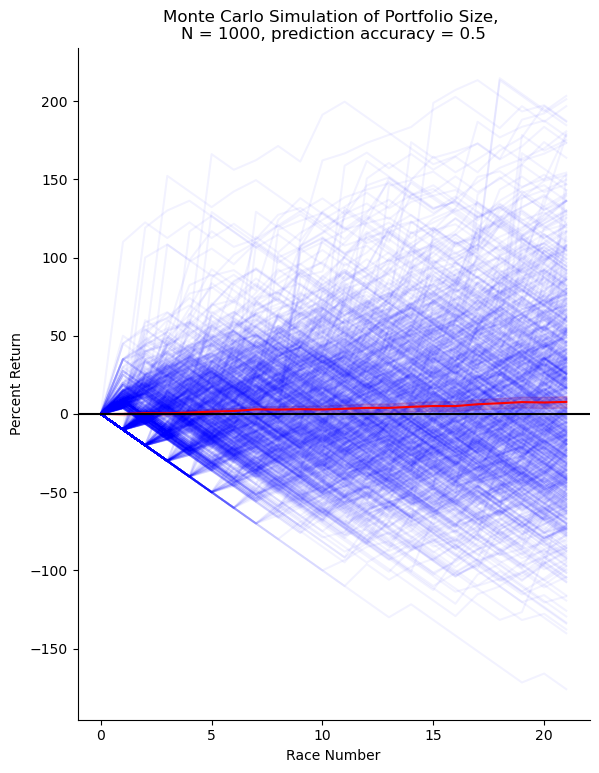

In [41]:
model(.5)

[ 0.         13.06931699 18.22785394 23.12180266 26.72136128 29.59214713
 32.05501511 34.58148025 37.48432631 39.131015   41.68711976 43.61770672
 45.37000104 46.9910759  48.80758068 51.01806375 53.16678154 55.10572974
 56.33470189 57.44410827 59.03238675 60.77096797]
Average Return: 54.54%
Percent Won: 82.9%
Percent Lost: 17.1%
Accuracy:  0.6
22


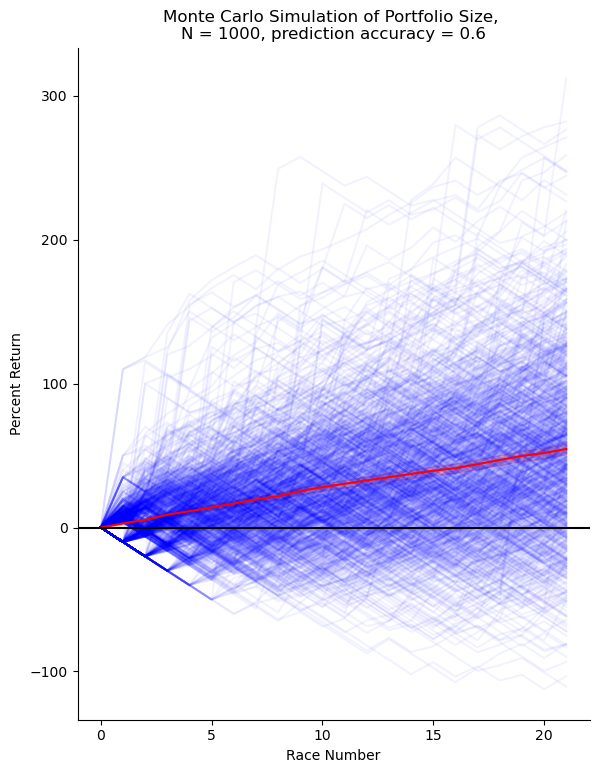

In [40]:
model(.6)